In [35]:
%%capture
!pip3 install matplotlib
!pip3 install numpy
!pip3 install scipy
!pip3 install sounddevice

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
from scipy import signal
import sounddevice as sd

In [9]:
# QUESTION 1

def sinusoid(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase=0.0):
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * np.sin(2*np.pi*freq*t+phase)
    return data

srate = 44100
data = sinusoid(440, 3)
ipd.Audio(data, rate=srate)

In [10]:
#QUESTION 2

def midi_to_sound(pitch, dur, srate=44100, amp=1.0):
    freq = 440*(2**((pitch-69)/12.0))
    return sinusoid(freq, dur, srate, amp)

data2 = np.hstack([midi_to_sound(52,0.33), midi_to_sound(52,0.33), midi_to_sound(52,0.33), midi_to_sound(57,1.5), midi_to_sound(64,1.5),
midi_to_sound(62,0.33), midi_to_sound(61,0.33), midi_to_sound(59,0.33), midi_to_sound(69,1.5),midi_to_sound(64,1.5)])

srate2 = 44100
print("MIDI Star Wars Opening Theme")
ipd.Audio(data2, rate=srate2)

MIDI Star Wars Opening Theme


In [11]:
#QUESTION 3

def play(note, durat):
    note_map = {"C":48, "Db":49, "D":50, "Eb":51, "E":52, "F":53, "Gb":54, "G":55, "Ab":56, "A":57, "Bb":58, "B":59, "CHigh":60}
    if note == "r":
        return midi_to_sound(48, durat, 44100, 0)
    else:
        return midi_to_sound(note_map[note], durat, 44100)

data3 = np.hstack([play("C",1), play("r",0.25), play("CHigh",1), play("B",0.5), 
                   play("G", 0.25), play("A",0.25), play("B",0.5), play("CHigh",0.5),
                   play("C",0.75), play("r",0.25), play("A",1), play("G",2)])

srate3 = 44100
print("Scored Language for Somewhere Over the Rainbow")
ipd.Audio(data3, rate=srate3)


Scored Language for Somewhere Over the Rainbow


In [12]:
# QUESTION 4

# Scipy Documentation: https://github.com/scipy/scipy/blob/v1.10.0/scipy/signal/_waveforms.py

#Sawtooth 
def sawtooth(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase=0.0):
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * signal.sawtooth(2*np.pi*freq*t+phase)
    return data

#Pulse (Square)
def square(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase=0.0):
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * np.where(np.sin(2*np.pi*freq*t+phase) > 0, 1, -1)
    return data

#Triangle (could also use width=0.5 from the scipy sawtooth function)
def triangle(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase=0.0):
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * abs(signal.sawtooth(2*np.pi*freq*t+phase))
    return data

#Noise
def noise(dur=1.0, srate=44100.0, amp=1.0, phase=0.0):
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * np.random.normal(0, 1.0, len(t))
    return data

print("Sawtooth Oscillator")
data4 = sawtooth(440,2)
srate4 = 44100
ipd.Audio(data4, rate=srate4)


Sawtooth Oscillator


In [13]:
data4 = square(440,2)
srate4 = 44100
print("Square Oscillator")
ipd.Audio(data4, rate=srate4)

Square Oscillator


In [14]:
data4 = triangle(440,2)
srate4 = 44100
print("Triangle Oscillator")
ipd.Audio(data4, rate=srate4)

Triangle Oscillator


In [16]:
data4 = noise(2)
srate4 = 44100
print("Noise")
ipd.Audio(data4, rate=srate4)

Noise


In [17]:
# QUESTION 5
# Resources: https://www.youtube.com/watch?v=egW_J4et4HA&ab_channel=Jammin%27Coder

def sine_x(amp, freq, t):
    return int(round(amp * np.sin(2*np.pi*freq*t)))

def sine5(freq=440.0, dur=1.0, srate=44100.0, bits=16, mute=False):
    num_samples = int(round(dur*srate))
    buffer = np.zeros((num_samples),dtype=np.int16)
    if mute:
        amp = 0
    else:
        amp = 2 ** (bits - 1) -1

    for sample_num in range(num_samples):
        t = float(sample_num) / srate
        sine = sine_x(amp,freq,t)
        buffer[sample_num] = sine

    sd.play(buffer)
    sd.wait()

sine5(440,3)

In [18]:
def midi_to_sound5(pitch, dur, srate=44100, mute=False):
    freq = 440*(2**((pitch-69)/12.0))
    return sine5(freq, dur, srate, mute=mute)

print("Plays Star Wars melody in real time when executed")

result5_2 = np.hstack([midi_to_sound5(52,0.33), midi_to_sound5(52,0.33), midi_to_sound5(52,0.33), midi_to_sound5(57,1.5), midi_to_sound5(64,1.5),
midi_to_sound5(62,0.33), midi_to_sound5(61,0.33), midi_to_sound5(59,0.33), midi_to_sound5(69,1.5),midi_to_sound5(64,1.5)])

Plays Star Wars melody in real time when executed


In [19]:
def play5(note, durat):
    note_map = {"C":48, "Db":49, "D":50, "Eb":51, "E":52, "F":53, "Gb":54, "G":55, "Ab":56, "A":57, "Bb":58, "B":59, "CHigh":60}
    if note == "r":
        return midi_to_sound5(48, durat, 44100, mute=True)
    else:
        return midi_to_sound5(note_map[note], durat, 44100)

print("Plays Somewhere Over the Rainbow melody in real time when executed")
data5_3 = np.hstack([play5("C",1), play5("r",0.25), play5("CHigh",1), play5("B",0.5), 
                   play5("G", 0.25), play5("A",0.25), play5("B",0.5), play5("CHigh",0.5),
                   play5("C",0.75), play5("r",0.25), play5("A",1), play5("G",2)])


Plays Somewhere Over the Rainbow melody in real time when executed


In [20]:
# QUESTION 6
#starts clipping at 8 voices

def polyphony(amp, freq, duration, sample_rate):
    h0 = noise(dur=duration, srate=sample_rate)
    h1 = sinusoid(freq, duration, sample_rate, amp)
    h2 = triangle(freq*2, duration, sample_rate, amp/2)
    h3 = sawtooth(freq*3, duration, sample_rate, amp/3)
    h4 = square(freq*4, duration, sample_rate, amp/4)
    h5 = sinusoid(freq*5, duration, sample_rate, amp/5)
    h6 = noise(dur=duration, srate=sample_rate, amp=amp/6)
    h7 = triangle(freq*6, duration, sample_rate, amp/7)
    h8 = sawtooth(freq*7, duration, sample_rate, amp/8)
    
    res_sin = np.hstack([(h1),(h1+h2),(h1+h2+h3),(h1+h2+h3+h4),(h1+h2+h3+h4+h5),(h1+h2+h3+h4+h5+h6),(h1+h2+h3+h4+h5+h6+h7), (h1+h2+h3+h4+h5+h6+h7+8)])
    return res_sin

data6 = polyphony(0.5, 220, 1, 44100)
ipd.Audio(data6, rate=44100)

In [3]:
# QUESTION 7
from IPython.display import Image

print("Question 1 in MAX/MSP")
Image(url="maxmsp_sine.png", width=500, height=500)


Question 1 in MAX/MSP


In [4]:
print("Question 2 in MAX/MSP")
Image(url="maxmsp_midi.png", width=500, height=500)

Question 2 in MAX/MSP


In [6]:
# QUESTION 8
# Nyquist Docs: https://github.com/audacity/audacity/blob/master/nyquist/nyquist.lsp
# Couldn't figure out how to run the Nyquist code, but here is the research I found for the different oscillator functions

# 8.1
'''
(defun sine (steps &optional (duration 1.0))
  (ny:typecheck (not (numberp steps))
    (ny:error "SINE" 1 '((STEP) "steps") steps))
  (ny:typecheck (not (numberp duration))
    (ny:error "SINE" 2 '((NUMBER) "duration") duration))
  (let ((hz (calculate-hz steps "sine"))
        (d (get-duration duration)))
    (ny:set-logical-stop
      (ny:scale-db (get-loud)
        (snd-sine *rslt* hz *sound-srate* d))
      duration)))
'''


# 8.2 and 8.3
'''
(defun set-pitch-names ()
   (setq no-pitch 116.0)
   ; note: 58.0 is A4 - (C0 - 1) = 69 - (12 - 1)
   (setf nyq:next-pitch (- (hz-to-step *A4-Hertz*) 58.0))

   (setf nyq:pitch-names
    '(c0 (cs0 df0) d0 (ds0 ef0) e0 f0 (fs0 gf0) g0 (gs0 af0) a0
      (as0 bf0) b0
      c1 (cs1 df1) d1 (ds1 ef1) e1 f1 (fs1 gf1) g1 (gs1 af1) a1
      (as1 bf1) b1
      c2 (cs2 df2) d2 (ds2 ef2) e2 f2 (fs2 gf2) g2 (gs2 af2) a2
      (as2 bf2) b2
      c3 (cs3 df3) d3 (ds3 ef3) e3 f3 (fs3 gf3) g3 (gs3 af3) a3
      (as3 bf3) b3
      c4 (cs4 df4) d4 (ds4 ef4) e4 f4 (fs4 gf4) g4 (gs4 af4) a4
      (as4 bf4) b4
      c5 (cs5 df5) d5 (ds5 ef5) e5 f5 (fs5 gf5) g5 (gs5 af5) a5
      (as5 bf5) b5
      c6 (cs6 df6) d6 (ds6 ef6) e6 f6 (fs6 gf6) g6 (gs6 af6) a6
      (as6 bf6) b6
      c7 (cs7 df7) d7 (ds7 ef7) e7 f7 (fs7 gf7) g7 (gs7 af7) a7
      (as7 bf7) b7
      c8 (cs8 df8) d8 (ds8 ef8) e8 f8 (fs8 gf8) g8 (gs8 af8) a8
      (as8 bf8) b8))

   (dolist (p nyq:pitch-names)
     (cond ((atom p) (set p (np)))
       (t (let ((pitch (np)))
        (dolist (s p) (set s pitch)))))))


(set-pitch-names)
'''

# 8.4

'''
## Sawtooth Osc
(setf *saw-table* (pwlvr -1 1 1))
(setf *saw-table* (list *saw-table* (hz-to-step 1) T))
(defun osc-saw (hz) (hzosc hz *saw-table*))

## Triangle Osc
(setf *tri-table* (pwlvr -1 0.5 1 0.5 -1))
(setf *tri-table* (list *tri-table* (hz-to-step 1) T))
(defun osc-tri (hz) (hzosc hz *tri-table*))

## Pulse Osc
(setf *step-shape* (seq (const -1) (const 1 1.01)))

(defun compare (x y &optional (compare-shape *step-shape*))
  (ny:typecheck (not (or (soundp x) (soundp y)))
    (error "In COMPARE, either first or second argument must be a sound"))
  (ny:typecheck (not (soundp compare-shape))
    (ny:error "COMPARE" 3 '((SOUND) "compare-shape") compare-shape))
  (ny:typecheck (not (or (soundp x) (numberp x)))
    (ny:error "COMPARE" 1 '((SOUND NUMBER) nil) x))
  (ny:typecheck (not (or (soundp y) (numberp y)))
    (ny:error "COMPARE" 2 '((SOUND NUMBER) nil) y))
  (let ((xydiff (diff-list x (list y) "COMPARE")))
    (shape xydiff compare-shape 1)))
    
(defun osc-pulse (hz bias &optional (compare-shape *step-shape*))
  (compare bias (osc-tri hz) compare-shape))

## Noise
(noise)
'''
print("Code not executed here")
  


Code not executed here


In [7]:
# QUESTION 9
print("See separate JavaScript files for q9")

See separate JavaScript files for q9


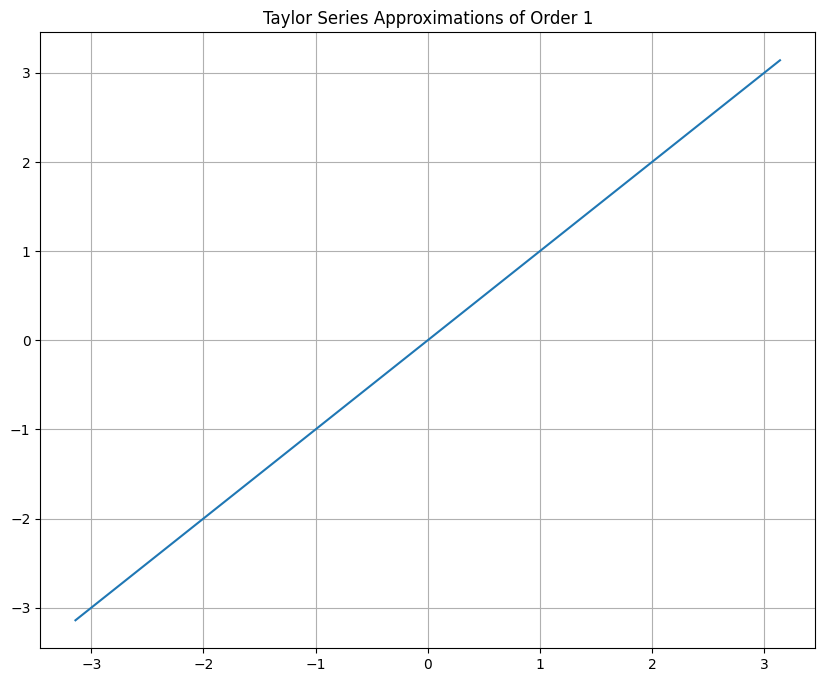

In [29]:
# QUESTION 10

def taylor_sine(degree):
    x = np.linspace(-np.pi, np.pi, 2000)
    y = np.zeros(len(x))
    plt.figure(figsize = (10,8))
    for n in range(degree):
        y = y + ((-1)**n * (x)**(2*n+1)) / np.math.factorial(2*n+1)
    plt.plot(x,y)
    plt.grid()
    plt.title(f'Taylor Series Approximations of Order {degree}')
    plt.show()
    return y

# From: https://github.com/gtzan/synthesizers_cs_perspective/blob/main/src/notebooks/Wavetable_synthesis.ipynb
def create_wavetable(length, degree):
    L = length+1 # add one sample to wavetable to allow edge interpolation
    t = np.linspace(0, 1.0 , L)
    wavetable = taylor_sine(degree)
    return wavetable

def wavetable_lookup(phase_index, wavetable):  
    x  = phase_index
    x0 = int(phase_index)
    x1 = x0+1
    y0 = wavetable[x0]
    y1 = wavetable[x1]
    return y0 * (x1-x) + y1 * (x - x0)

table_length = 1000
phase_index = 0 
freq = 220 
srate10 = 44100
phase_increment = (table_length * freq) / srate10 

data10 = np.zeros(srate10)
wavetable = create_wavetable(table_length, 1)
for t in np.arange(0,srate10): 
    phase_index = (phase_index + phase_increment) % table_length
    data10[t] = wavetable_lookup(phase_index, wavetable)
ipd.Audio(data10, rate=srate10)



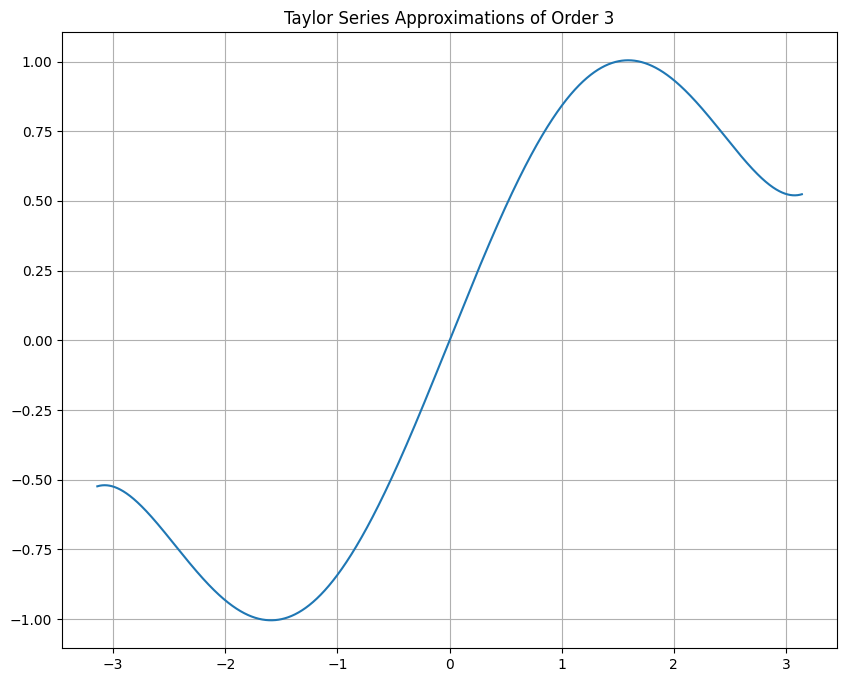

In [31]:
data10 = np.zeros(srate10)
wavetable = create_wavetable(table_length, 3)
for t in np.arange(0,srate10): 
    phase_index = (phase_index + phase_increment) % table_length
    data10[t] = wavetable_lookup(phase_index, wavetable)
ipd.Audio(data10, rate=srate10)

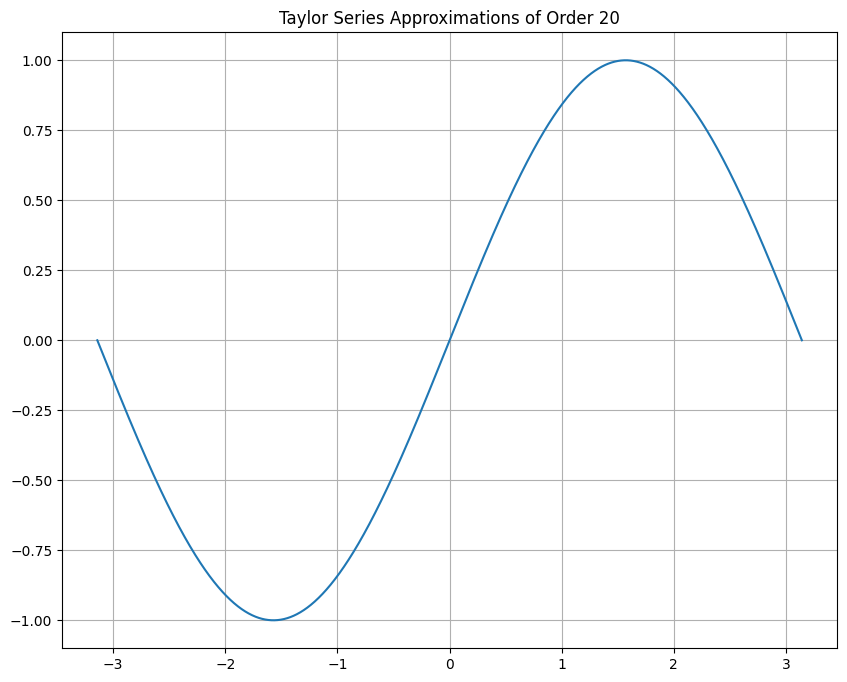

In [32]:
data10 = np.zeros(srate10)
wavetable = create_wavetable(table_length, 20)
for t in np.arange(0,srate10): 
    phase_index = (phase_index + phase_increment) % table_length
    data10[t] = wavetable_lookup(phase_index, wavetable)
ipd.Audio(data10, rate=srate10)